In [ ]:
#https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/#:~:text=The%20AUC%20for%20the%20ROC,skill%20and%20perfect%20skill%20respectively.


In [28]:
# roc curve and auc
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
# generate 2 class dataset
X, y = make_classification(n_samples=1000, n_classes=2, random_state=1)
# split into train/test sets
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2)
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(testy))]
# fit a model
model = LogisticRegression(solver='lbfgs')
model.fit(trainX, trainy)
# predict probabilities
lr_probs = model.predict_proba(testX)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]


In [20]:
pd.DataFrame( {"Test":testy,"Pred_Prob": lr_probs})

,Test,Pred_Prob
0,1,0.995973
1,1,0.997995
2,0,0.005299
3,0,0.152374
4,1,0.998333
...,...,...
495,1,0.891811
496,1,0.948744
497,0,0.223875
498,0,0.715863


In [41]:
# calculate scores
ns_auc = roc_auc_score(testy, ns_probs)
lr_auc = roc_auc_score(testy, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(testy, ns_probs)
lr_fpr, lr_tpr, thresholds  = roc_curve(testy, lr_probs)

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.903


In [42]:
pd.DataFrame({"TPR":lr_tpr, "FPR":lr_fpr,"Thresholds":thresholds})

,TPR,FPR,Thresholds
0,0.000000,0.000000,1.999811
1,0.003846,0.000000,0.999811
2,0.111538,0.000000,0.992408
3,0.111538,0.004167,0.991680
4,0.126923,0.004167,0.990145
...,...,...,...
117,0.992308,0.737500,0.017727
118,0.996154,0.737500,0.016873
119,0.996154,0.858333,0.006237
120,1.000000,0.858333,0.006138


In [26]:
pd.DataFrame({"NS_FPR":ns_fpr, "NS_TPR":ns_tpr})

,NS_FPR,NS_TPR
0,0.0,0.0
1,1.0,1.0


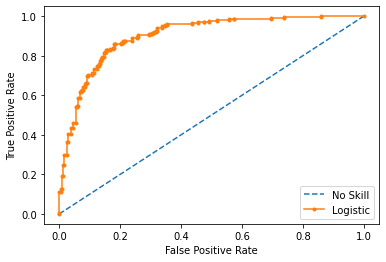

In [24]:
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [ ]:
# What Are Precision-Recall Curves?

In [33]:
# precision-recall curve and f1
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from matplotlib import pyplot
# generate 2 class dataset
X, y = make_classification(n_samples=1000, n_classes=2, random_state=1)
# split into train/test sets
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2)
# fit a model
model = LogisticRegression(solver='lbfgs')
model.fit(trainX, trainy)
# predict probabilities
lr_probs = model.predict_proba(testX)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]


In [46]:
# predict class values
yhat = model.predict(testX)
lr_precision, lr_recall, thresholds = precision_recall_curve(testy, lr_probs)
lr_f1, lr_auc = f1_score(testy, yhat), auc(lr_recall, lr_precision)
# summarize scores
print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves


Logistic: f1=0.841 auc=0.898


In [48]:
thresholds.shape, lr_recall.shape

((466,), (467,))

In [49]:
pd.DataFrame({"Recall":lr_recall[1:],"Precision":lr_precision[1:],"Thresholds":thresholds})

,Recall,Precision,Thresholds
0,0.996154,0.556989,0.006138
1,0.996154,0.558190,0.006237
2,0.996154,0.559395,0.006442
3,0.996154,0.560606,0.006537
4,0.996154,0.561822,0.007260
...,...,...,...
461,0.015385,1.000000,0.999022
462,0.011538,1.000000,0.999150
463,0.007692,1.000000,0.999561
464,0.003846,1.000000,0.999649


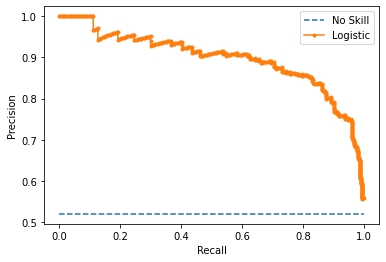

In [57]:
no_skill = len(testy[testy==1]) / len(testy)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(lr_recall, lr_precision, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [ ]:
help(LogisticRegression)